In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Embedding,Input,Dense,Conv2D,Dropout,BatchNormalization,Dropout,Flatten
from keras.utils import to_categorical
from keras.models import Model
from keras.optimizers import Adam


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
path = '../../data/ml-latest-small/'
batch_size=64

In [3]:
ratings=pd.read_csv(path+'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
len(ratings)

100004

In [5]:
len(ratings.userId.unique()),len(ratings.movieId.unique())

(671, 9066)

In [6]:
users=ratings.userId.unique();
movies=ratings.movieId.unique();
n_users=len(users);
n_movies=len(movies)

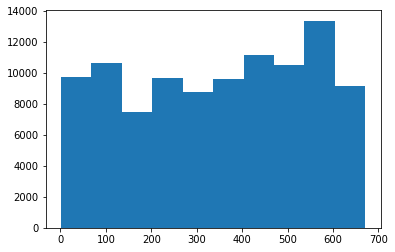

In [7]:
plt.hist(ratings.userId);

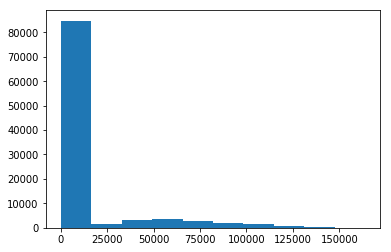

In [8]:
plt.hist(ratings.movieId);

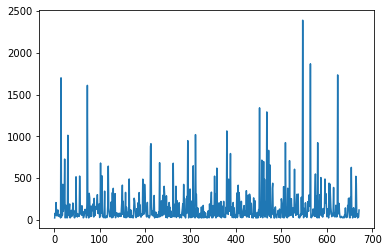

In [9]:
aa=ratings.groupby('userId').agg('movieId')

plt.plot(aa.count());

In [10]:
user2idx = {user:i for i,user in enumerate(users)};
movie2idx = {movie:i for i,movie in enumerate(movies)};

Now we got ids for unique Movie ids and User Ids.
Let us replace this value in dataframe using apply method

In [11]:
ratings.userId=ratings.userId.apply(lambda x : user2idx[x]);
ratings.movieId=ratings.movieId.apply(lambda x : movie2idx[x]);

In [12]:
n_factors=50; #Latent factors
np.random.seed(10)
mask = np.random.rand(len(ratings))<0.75
trn=ratings[mask]
val=ratings[~mask]

Creating input such that it takes user id and movie id as input

In [13]:
from keras.regularizers import l2
from keras.layers import concatenate

In [14]:
input_u = Input(shape=(1,),dtype='int64',name = 'user')
u=Embedding(n_users,n_factors,input_length=1,embeddings_regularizer=l2(1e-04))(input_u)

In [15]:
input_m = Input(shape=(1,),dtype='int64',name = 'movie')
m=Embedding(n_movies,n_factors,input_length=1,embeddings_regularizer=l2(1e-04))(input_m)

In [16]:
u

<tf.Tensor 'embedding_1/embedding_lookup/Identity:0' shape=(?, 1, 50) dtype=float32>

In [17]:
x=concatenate([u,m])

x=Flatten()(x)

x=Dropout(0.3)(x)
x=Dense(70,activation='relu')(x)
x=Dropout(0.75)(x)
# x=Dense(10,activation='relu')(x)
# x=Dropout(0.2)(x)
x=Dense(1)(x)

In [18]:
model=Model([input_u,input_m],x)

In [19]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
movie (InputLayer)              (None, 1)            0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 50)        33550       user[0][0]                       
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1, 50)        453300      movie[0][0]                      
__________________________________________________________________________________________________
concatenat

In [20]:
model.compile(optimizer=Adam(lr=0.001),loss='mse')

In [21]:
model.fit([trn.userId,trn.movieId],trn.rating,batch_size=32,epochs=8,validation_data=
         ([val.userId,val.movieId],val.rating))

Train on 75259 samples, validate on 24745 samples
Epoch 1/8
75259/75259 [==============================] - 16s 207us/step - loss: 2.1997 - val_loss: 0.9282
Epoch 2/8
75259/75259 [==============================] - 15s 203us/step - loss: 1.2498 - val_loss: 0.8723
Epoch 3/8
75259/75259 [==============================] - 15s 203us/step - loss: 0.9599 - val_loss: 0.8594
Epoch 4/8
75259/75259 [==============================] - 15s 203us/step - loss: 0.8617 - val_loss: 0.8530
Epoch 5/8
75259/75259 [==============================] - 15s 204us/step - loss: 0.8295 - val_loss: 0.8516
Epoch 6/8
75259/75259 [==============================] - 15s 205us/step - loss: 0.8210 - val_loss: 0.8530
Epoch 7/8
75259/75259 [==============================] - 15s 203us/step - loss: 0.8170 - val_loss: 0.8536
Epoch 8/8
75259/75259 [==============================] - 15s 203us/step - loss: 0.8142 - val_loss: 0.8515


In [32]:
model.predict([np.array([10]),np.array([24])])

array([[4.6653132]], dtype=float32)

In [33]:
ratings[ratings.userId==10]

,userId,movieId,rating,timestamp
790,10,24,5.0,1391658537
791,10,547,1.0,1391656827
792,10,548,4.0,1391657561
793,10,549,3.0,1391657297
794,10,49,5.0,1391658423
795,10,103,4.5,1391658505
796,10,550,3.5,1391656845
797,10,551,5.0,1391658556
798,10,552,4.5,1391658634
799,10,553,5.0,1391658440
